# Initial codes

This notebook illustrates how Bayesian inference can be used to infer response rates of each group (basket) in a Basket trial.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import sys
from os.path import exists

sys.path.append('..')
sys.path.append('.')

In [3]:
import numpy as np
import pandas as pd
import arviz as az

In [4]:
from pyBasket.env import Trial, TrueResponseSite
from pyBasket.common import DEFAULT_DECISION_THRESHOLD, DEFAULT_DECISION_THRESHOLD_INTERIM
from pyBasket.common import MODEL_INDEPENDENT, MODEL_INDEPENDENT_BERN, MODEL_BHM, MODEL_PYBASKET

In [5]:
DEBUG = True

In [6]:
num_burn_in = 5E3
num_posterior_samples = 5E3
num_chains = None # let pymc decide

In [7]:
if DEBUG:
    num_burn_in = 1E3
    num_posterior_samples = 1E3
    num_chains = 4

## Example 1: treatment is of interest in all groups

Same example as in [Berry et al. 2013](https://journals.sagepub.com/doi/full/10.1177/1740774513497539) (Figure 1).

4 groups are present in the trial, and all group response rates to the treatment are the same (0.3). The trial enrolls patients in 6 stages, first taking 10 patient for each group in the first stage, followed by 5 patients for each group in latter stages.

> The first example is a scenario in which responses are simulated assuming p = 30% in all four groups. This example illustrates the effect of borrowing across groups when all groups are similar, such as the smoothing of the observed response rates and a reduction in uncertainty.

### Generate data

In [8]:
K = 4    # the number of groups
p0 = 0.1 # null response rate
p1 = 0.3 # target response rate

true_response_rates = [p1, p1, p1, p1]
enrollments = [[10, 5, 5, 5, 5, 5] for _ in range(K)]
site = TrueResponseSite(true_response_rates, enrollments)

evaluate_interim = [True, True, True, True, True, True] # evaluate every interim stage
analysis_names = [MODEL_INDEPENDENT, MODEL_BHM]

In [9]:
dt = DEFAULT_DECISION_THRESHOLD
dt_interim = DEFAULT_DECISION_THRESHOLD_INTERIM
early_futility_stop = True

In [10]:
trial = Trial(K, p0, p1, site, evaluate_interim, 
              num_burn_in, num_posterior_samples, analysis_names, 
              dt=dt, dt_interim=dt_interim,
              early_futility_stop=early_futility_stop,
              num_chains=num_chains)

done = trial.reset()
while not done:
    done = trial.step()

2023-06-23 11:23:06.802 | DEBUG    | pyBasket.env:step:241 - 
########## Stage=0 ##########

2023-06-23 11:23:06.803 | DEBUG    | pyBasket.env:step:254 - Registering Group 0 (OPEN): 2/10 for Analysis independent
2023-06-23 11:23:06.803 | DEBUG    | pyBasket.env:step:254 - Registering Group 0 (OPEN): 2/10 for Analysis BHM
2023-06-23 11:23:06.804 | DEBUG    | pyBasket.env:step:254 - Registering Group 1 (OPEN): 2/10 for Analysis independent
2023-06-23 11:23:06.804 | DEBUG    | pyBasket.env:step:254 - Registering Group 1 (OPEN): 2/10 for Analysis BHM
2023-06-23 11:23:06.804 | DEBUG    | pyBasket.env:step:254 - Registering Group 2 (OPEN): 3/10 for Analysis independent
2023-06-23 11:23:06.805 | DEBUG    | pyBasket.env:step:254 - Registering Group 2 (OPEN): 3/10 for Analysis BHM
2023-06-23 11:23:06.805 | DEBUG    | pyBasket.env:step:254 - Registering Group 3 (OPEN): 3/10 for Analysis independent
2023-06-23 11:23:06.805 | DEBUG    | pyBasket.env:step:254 - Registering Group 3 (OPEN): 3/10 for 

### Check last results

### Simple

In [11]:
analysis_name = analysis_names[0]
analysis_name

'independent'

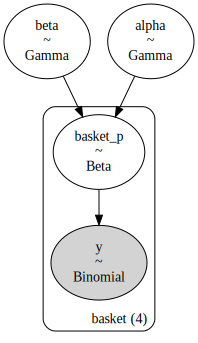

In [12]:
trial.visualise_model(analysis_name)

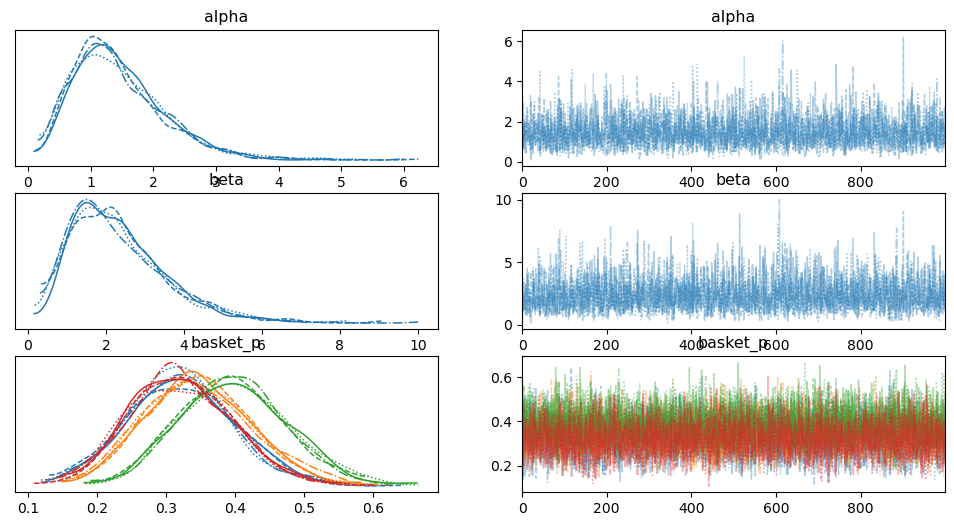

In [13]:
trial.plot_trace(analysis_name, -1)

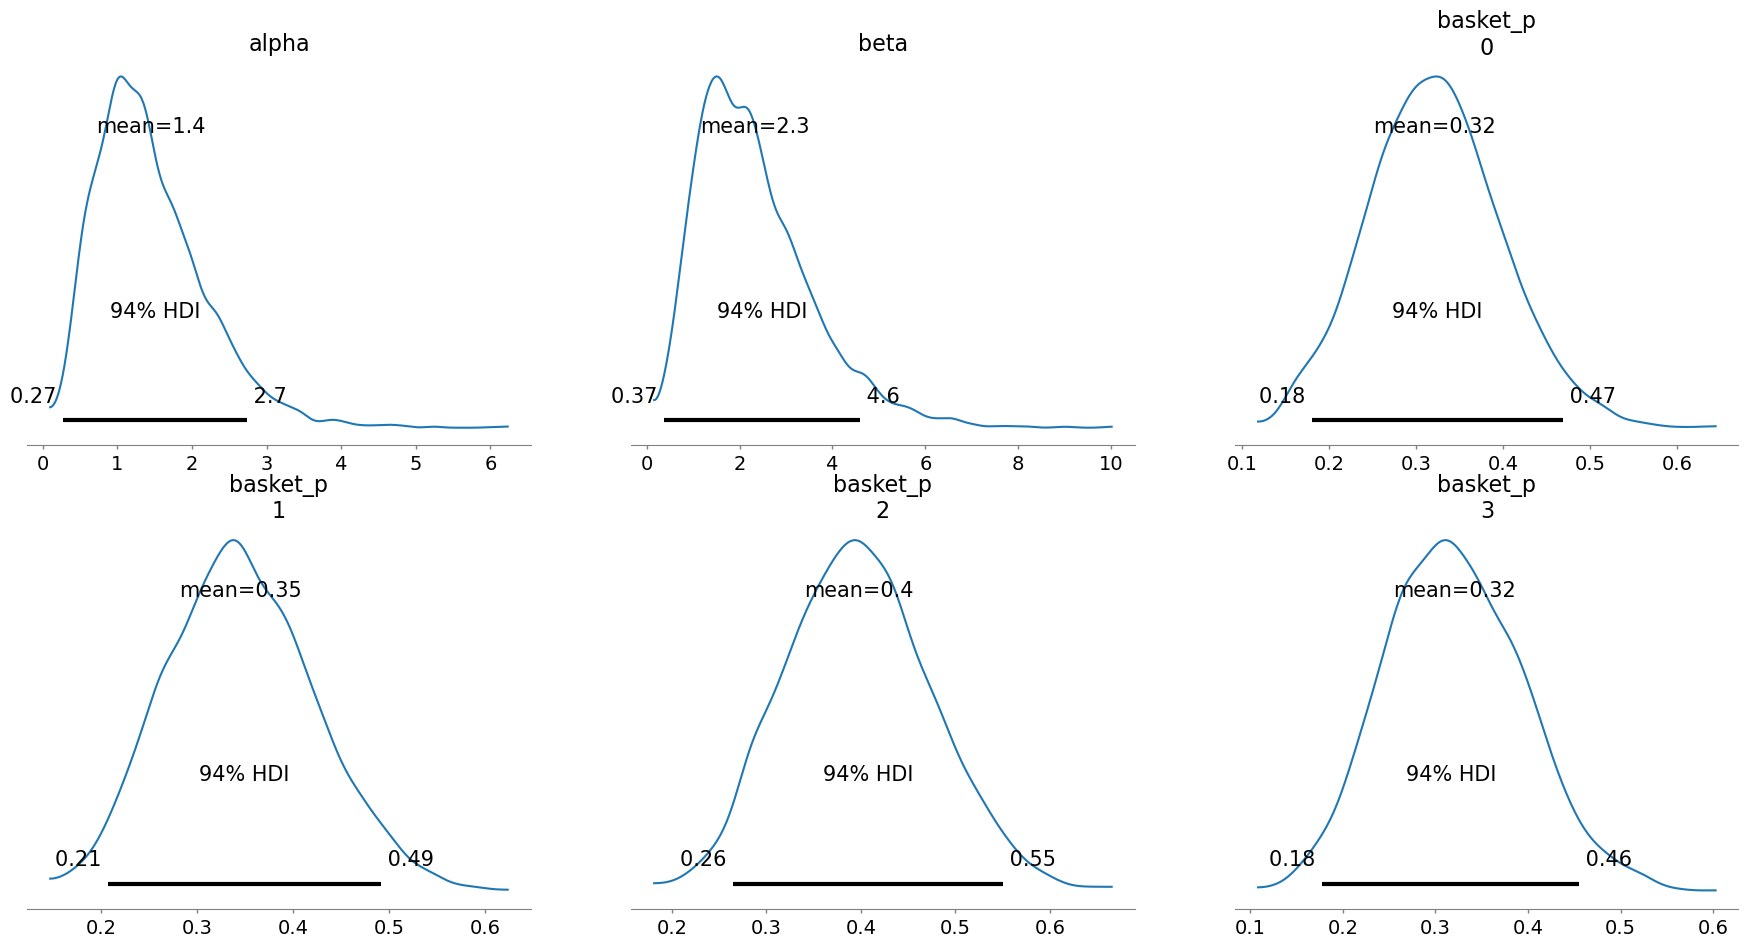

In [14]:
trial.plot_posterior(analysis_name, -1)

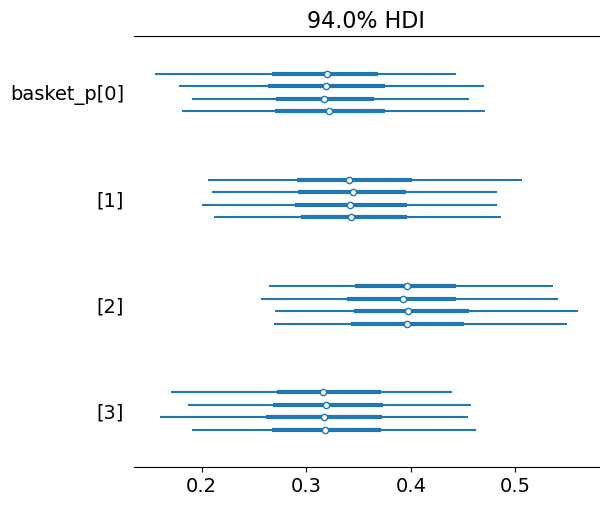

In [15]:
trial.plot_forest(analysis_name, -1)

In [16]:
trial.interim_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.56800,0.05,True,OPEN,2,10
1,0.58125,0.05,True,OPEN,2,10
2,0.78925,0.05,True,OPEN,3,10
3,0.78925,0.05,True,OPEN,3,10


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.89675,0.05,True,OPEN,5,15
1,0.79050,0.05,True,OPEN,4,15
2,0.96500,0.05,True,OPEN,6,15
3,0.90300,0.05,True,OPEN,5,15


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.93975,0.05,True,OPEN,7,20
1,0.75375,0.05,True,OPEN,5,20
2,0.94475,0.05,True,OPEN,7,20
3,0.95125,0.05,True,OPEN,7,20


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.86950,0.05,True,OPEN,7,25
1,0.93175,0.05,True,OPEN,8,25
2,0.97250,0.05,True,OPEN,9,25
3,0.97300,0.05,True,OPEN,9,25


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.91625,0.05,True,OPEN,9,30
1,0.96775,0.05,True,OPEN,10,30
2,0.98675,0.05,True,OPEN,11,30
3,0.95725,0.05,True,OPEN,10,30


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,1.0,0.9,True,COMPLETED_EFFECTIVE,11,35
1,1.0,0.9,True,COMPLETED_EFFECTIVE,12,35
2,1.0,0.9,True,COMPLETED_EFFECTIVE,14,35
3,1.0,0.9,True,COMPLETED_EFFECTIVE,11,35


In [17]:
trial.final_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,1.0,0.9,True,COMPLETED_EFFECTIVE,11,35
1,1.0,0.9,True,COMPLETED_EFFECTIVE,12,35
2,1.0,0.9,True,COMPLETED_EFFECTIVE,14,35
3,1.0,0.9,True,COMPLETED_EFFECTIVE,11,35


### BHM

In [18]:
analysis_name = analysis_names[1]
analysis_name

'BHM'

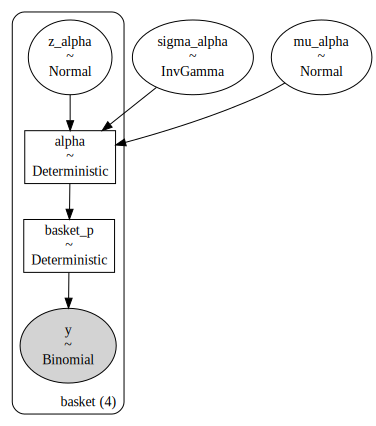

In [19]:
trial.visualise_model(analysis_name)

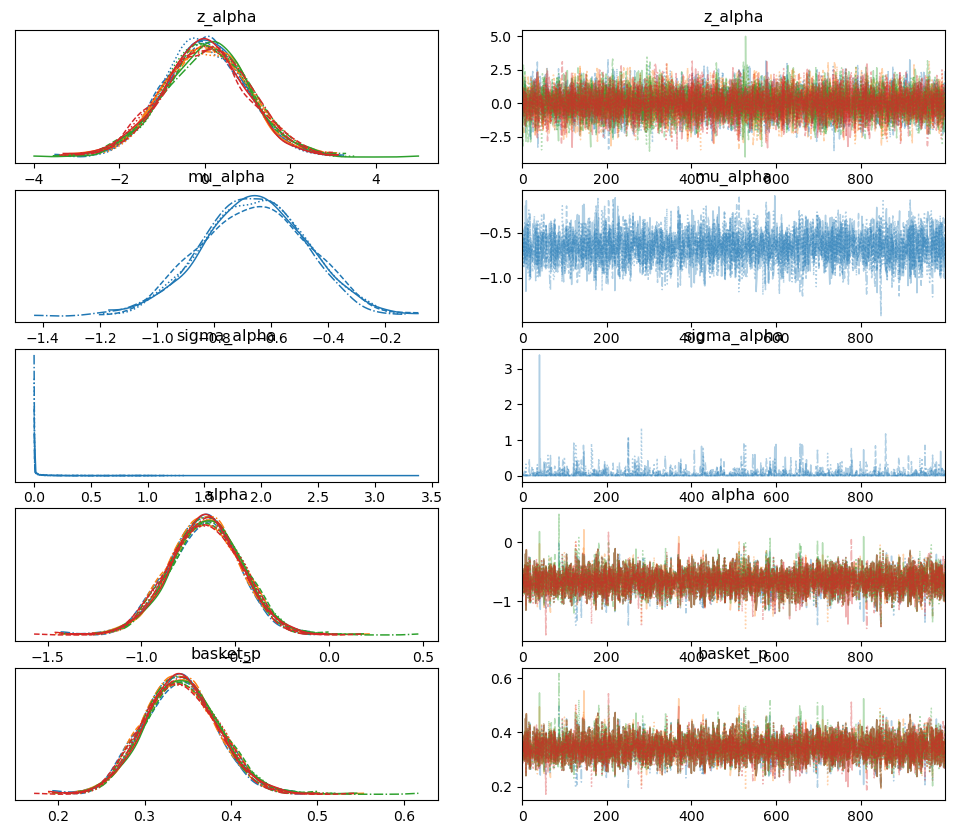

In [20]:
trial.plot_trace(analysis_name, -1)

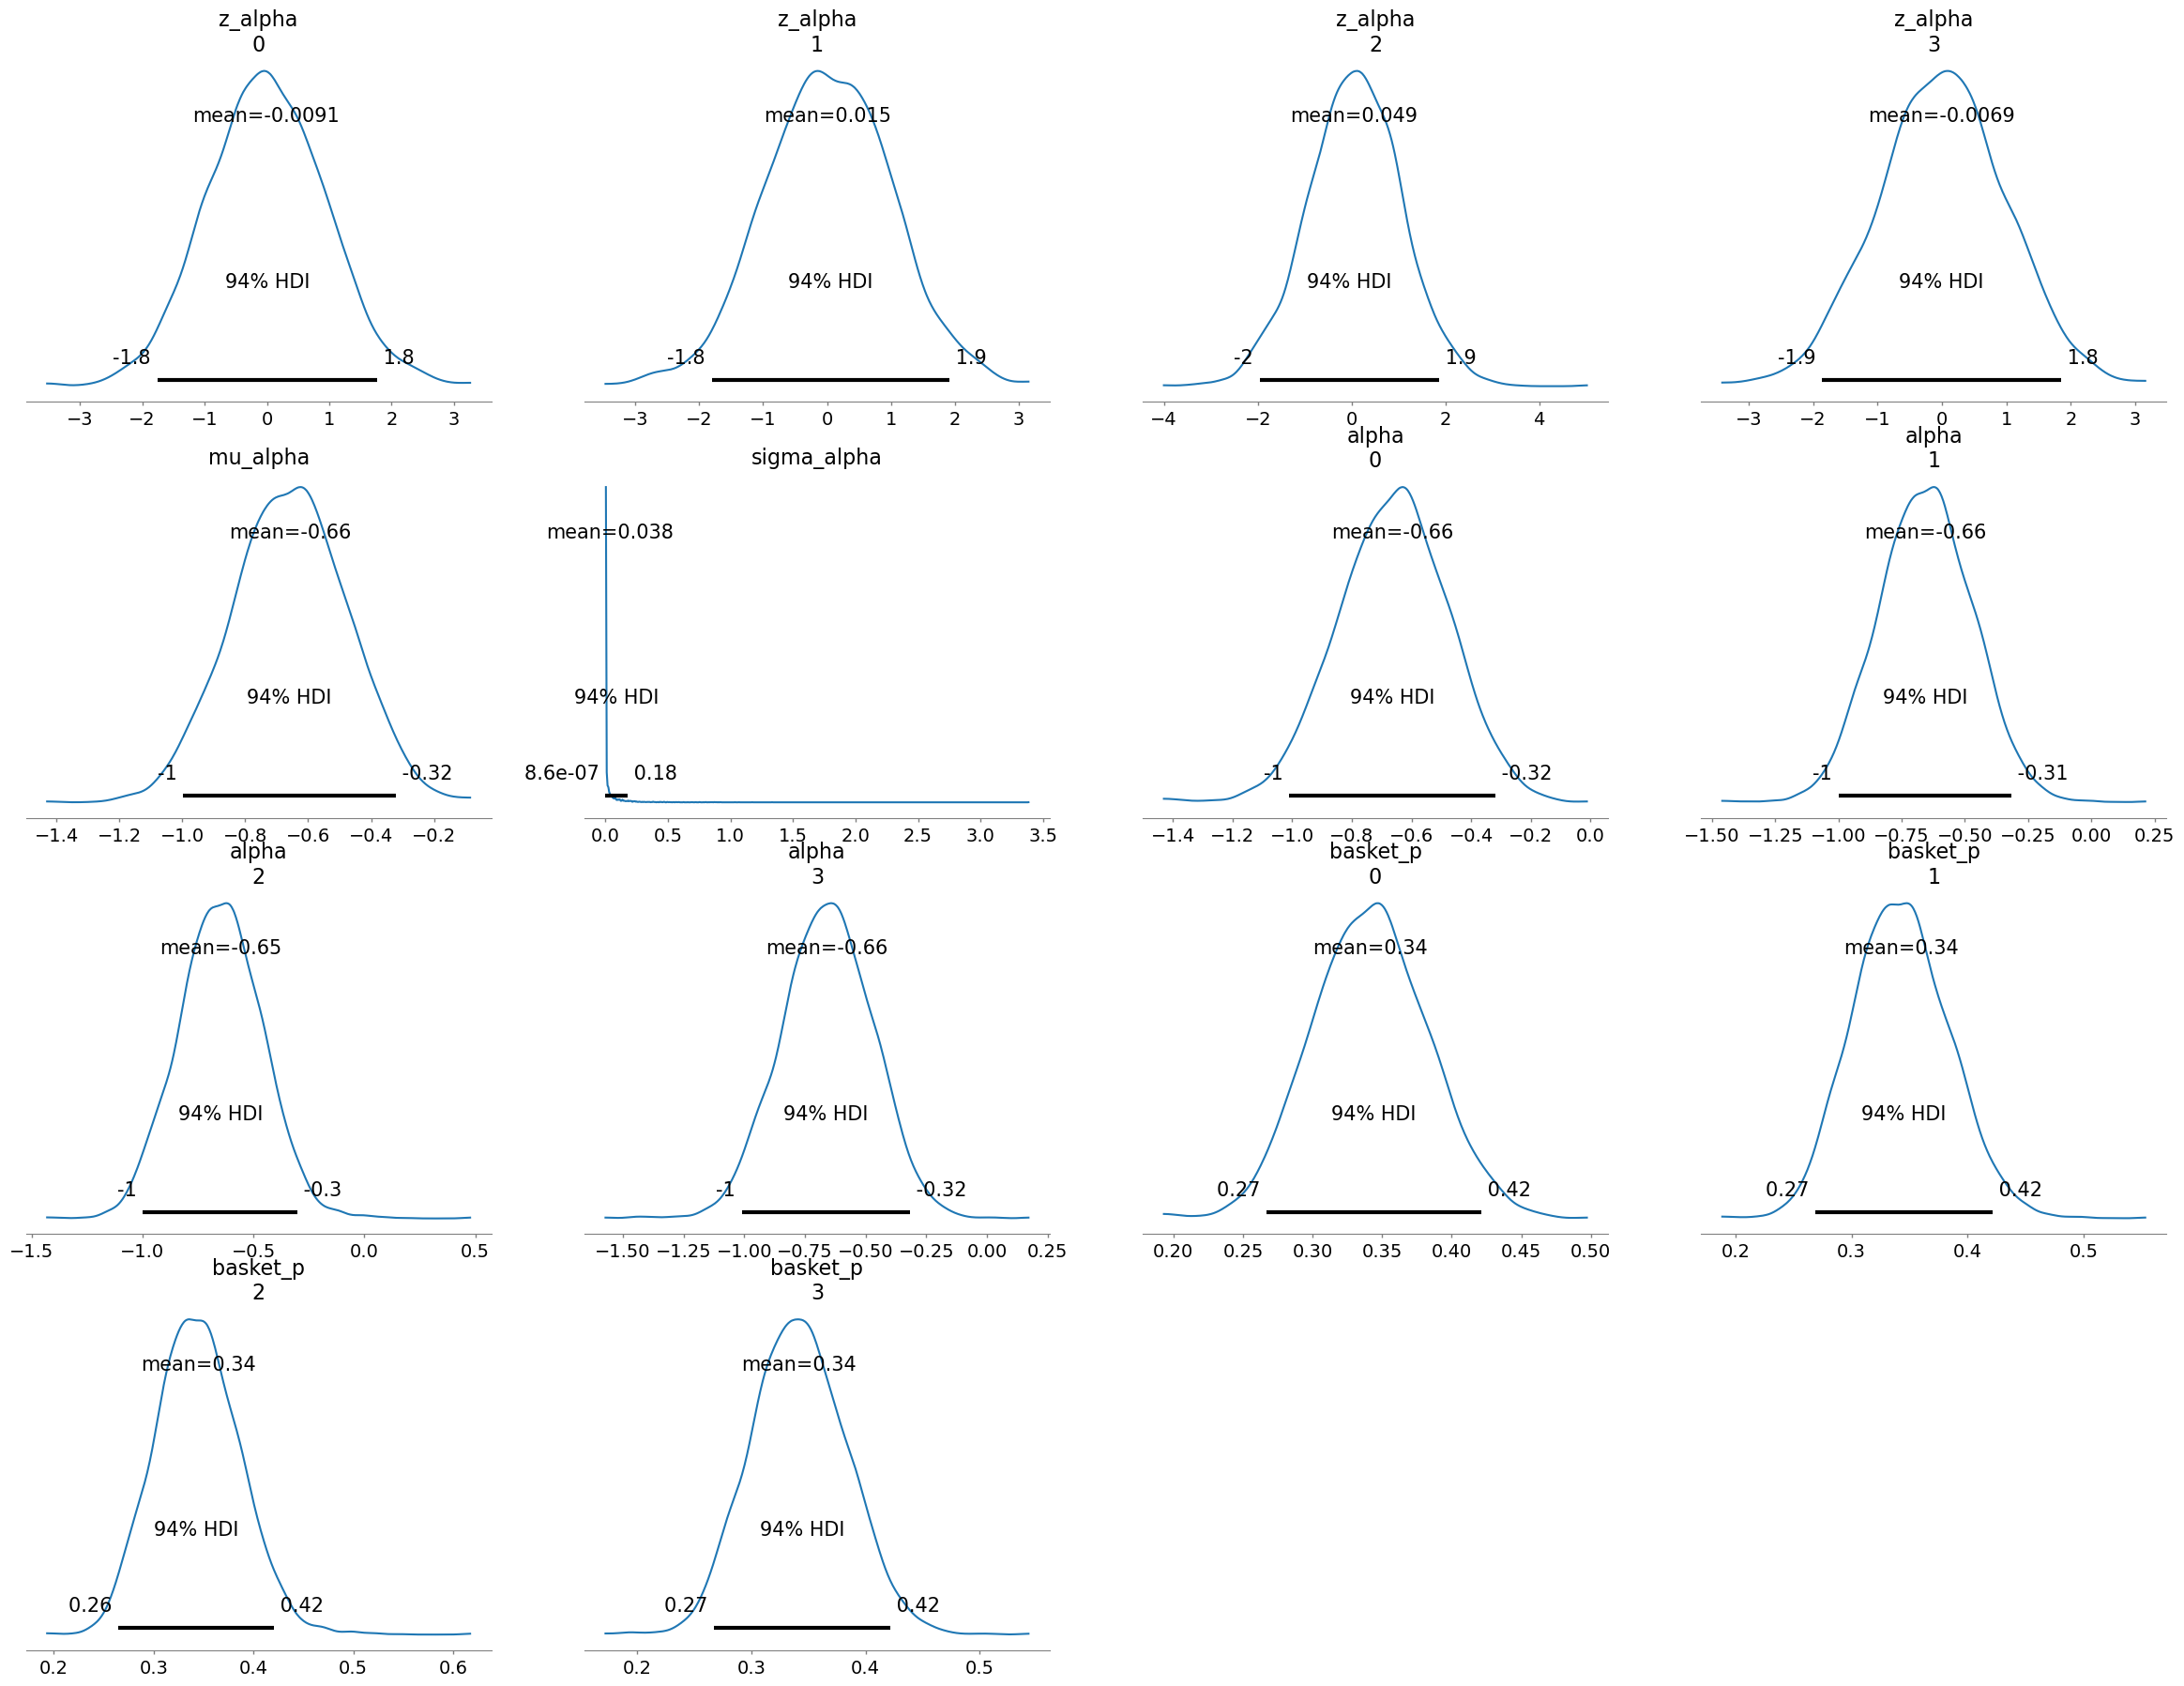

In [21]:
trial.plot_posterior(analysis_name, -1)

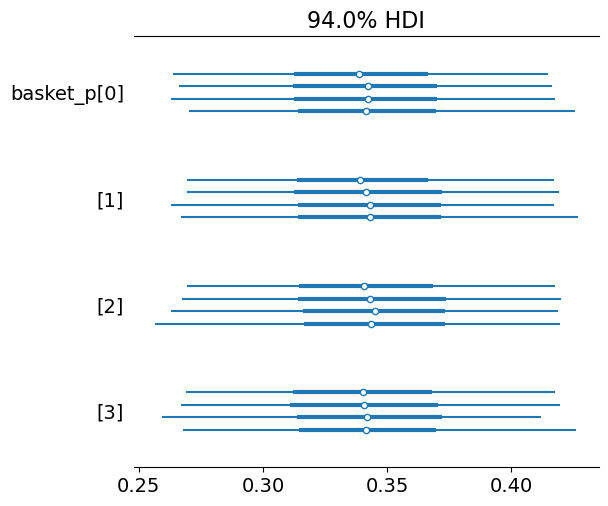

In [22]:
trial.plot_forest(analysis_name, -1)

In [23]:
trial.interim_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.74425,0.05,True,OPEN,2,10
1,0.74750,0.05,True,OPEN,2,10
2,0.75950,0.05,True,OPEN,3,10
3,0.75575,0.05,True,OPEN,3,10


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.99025,0.05,True,OPEN,5,15
1,0.98600,0.05,True,OPEN,4,15
2,0.99150,0.05,True,OPEN,6,15
3,0.99125,0.05,True,OPEN,5,15


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.99275,0.05,True,OPEN,7,20
1,0.98850,0.05,True,OPEN,5,20
2,0.99450,0.05,True,OPEN,7,20
3,0.99475,0.05,True,OPEN,7,20


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.99425,0.05,True,OPEN,7,25
1,0.99650,0.05,True,OPEN,8,25
2,0.99800,0.05,True,OPEN,9,25
3,0.99725,0.05,True,OPEN,9,25


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.99750,0.05,True,OPEN,9,30
1,0.99900,0.05,True,OPEN,10,30
2,0.99950,0.05,True,OPEN,11,30
3,0.99925,0.05,True,OPEN,10,30


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,1.0,0.9,True,COMPLETED_EFFECTIVE,11,35
1,1.0,0.9,True,COMPLETED_EFFECTIVE,12,35
2,1.0,0.9,True,COMPLETED_EFFECTIVE,14,35
3,1.0,0.9,True,COMPLETED_EFFECTIVE,11,35


In [24]:
trial.final_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,1.0,0.9,True,COMPLETED_EFFECTIVE,11,35
1,1.0,0.9,True,COMPLETED_EFFECTIVE,12,35
2,1.0,0.9,True,COMPLETED_EFFECTIVE,14,35
3,1.0,0.9,True,COMPLETED_EFFECTIVE,11,35


## Example 2: treatment is of interest in only two groups

Same example as in [Berry et al. 2013](https://journals.sagepub.com/doi/full/10.1177/1740774513497539) (Figure 2).

4 groups are present in the group, with first two group responses = 0.10 and the other two groups = 0.3. The trial enrolls patients in 6 stages, first taking 10 patient for each group in the first stage, followed by 5 patients for each group in latter stages.

> The second example is from a scenario in which responses are simulated assuming p = 10% in two groups and p = 30% in two groups. This example illustrates the effect of borrowing, and that the harm is not great, when groups are dissimilar.

### Generate data

In [25]:
K = 4    # the number of groups
p0 = 0.1 # null response rate
p1 = 0.3 # target response rate

true_response_rates = [p0, p0, p1, p1]
enrollments = [[10, 5, 5, 5, 5, 5] for _ in range(K)]
site = TrueResponseSite(true_response_rates, enrollments)

evaluate_interim = [True, True, True, True, True, True] # evaluate every interim stage
analysis_names = [MODEL_INDEPENDENT, MODEL_BHM]

In [26]:
dt = DEFAULT_DECISION_THRESHOLD
dt_interim = DEFAULT_DECISION_THRESHOLD_INTERIM
early_futility_stop = True

In [27]:
trial = Trial(K, p0, p1, site, evaluate_interim, 
              num_burn_in, num_posterior_samples, analysis_names, 
              dt=dt, dt_interim=dt_interim,
              early_futility_stop=early_futility_stop,
              num_chains=num_chains)

done = trial.reset()
while not done:
    done = trial.step()

2023-06-23 11:30:18.842 | DEBUG    | pyBasket.env:step:241 - 
########## Stage=0 ##########

2023-06-23 11:30:18.843 | DEBUG    | pyBasket.env:step:254 - Registering Group 0 (OPEN): 2/10 for Analysis independent
2023-06-23 11:30:18.843 | DEBUG    | pyBasket.env:step:254 - Registering Group 0 (OPEN): 2/10 for Analysis BHM
2023-06-23 11:30:18.844 | DEBUG    | pyBasket.env:step:254 - Registering Group 1 (OPEN): 4/10 for Analysis independent
2023-06-23 11:30:18.844 | DEBUG    | pyBasket.env:step:254 - Registering Group 1 (OPEN): 4/10 for Analysis BHM
2023-06-23 11:30:18.845 | DEBUG    | pyBasket.env:step:254 - Registering Group 2 (OPEN): 2/10 for Analysis independent
2023-06-23 11:30:18.845 | DEBUG    | pyBasket.env:step:254 - Registering Group 2 (OPEN): 2/10 for Analysis BHM
2023-06-23 11:30:18.845 | DEBUG    | pyBasket.env:step:254 - Registering Group 3 (OPEN): 1/10 for Analysis independent
2023-06-23 11:30:18.846 | DEBUG    | pyBasket.env:step:254 - Registering Group 3 (OPEN): 1/10 for 

### Check last results

### Simple

In [28]:
analysis_name = analysis_names[0]
analysis_name

'independent'

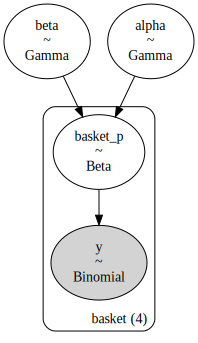

In [29]:
trial.visualise_model(analysis_name)

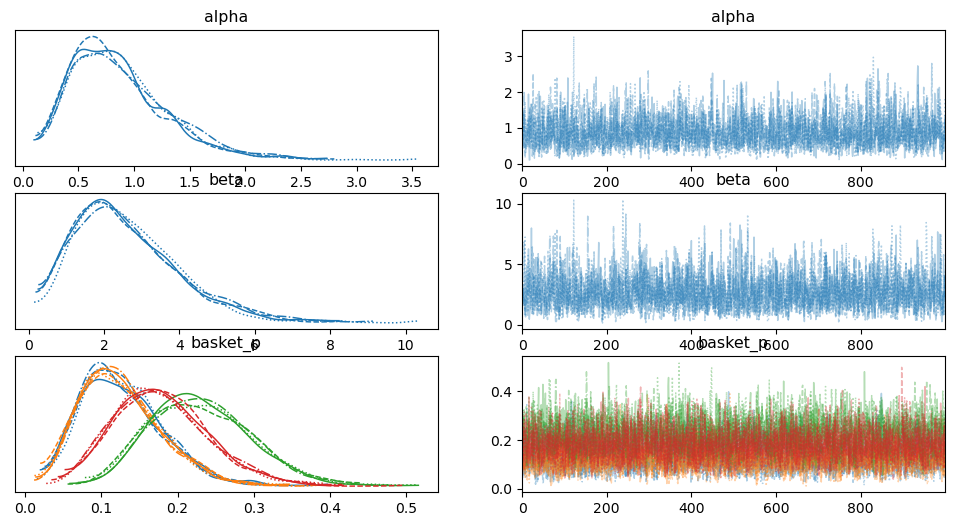

In [30]:
trial.plot_trace(analysis_name, -1)

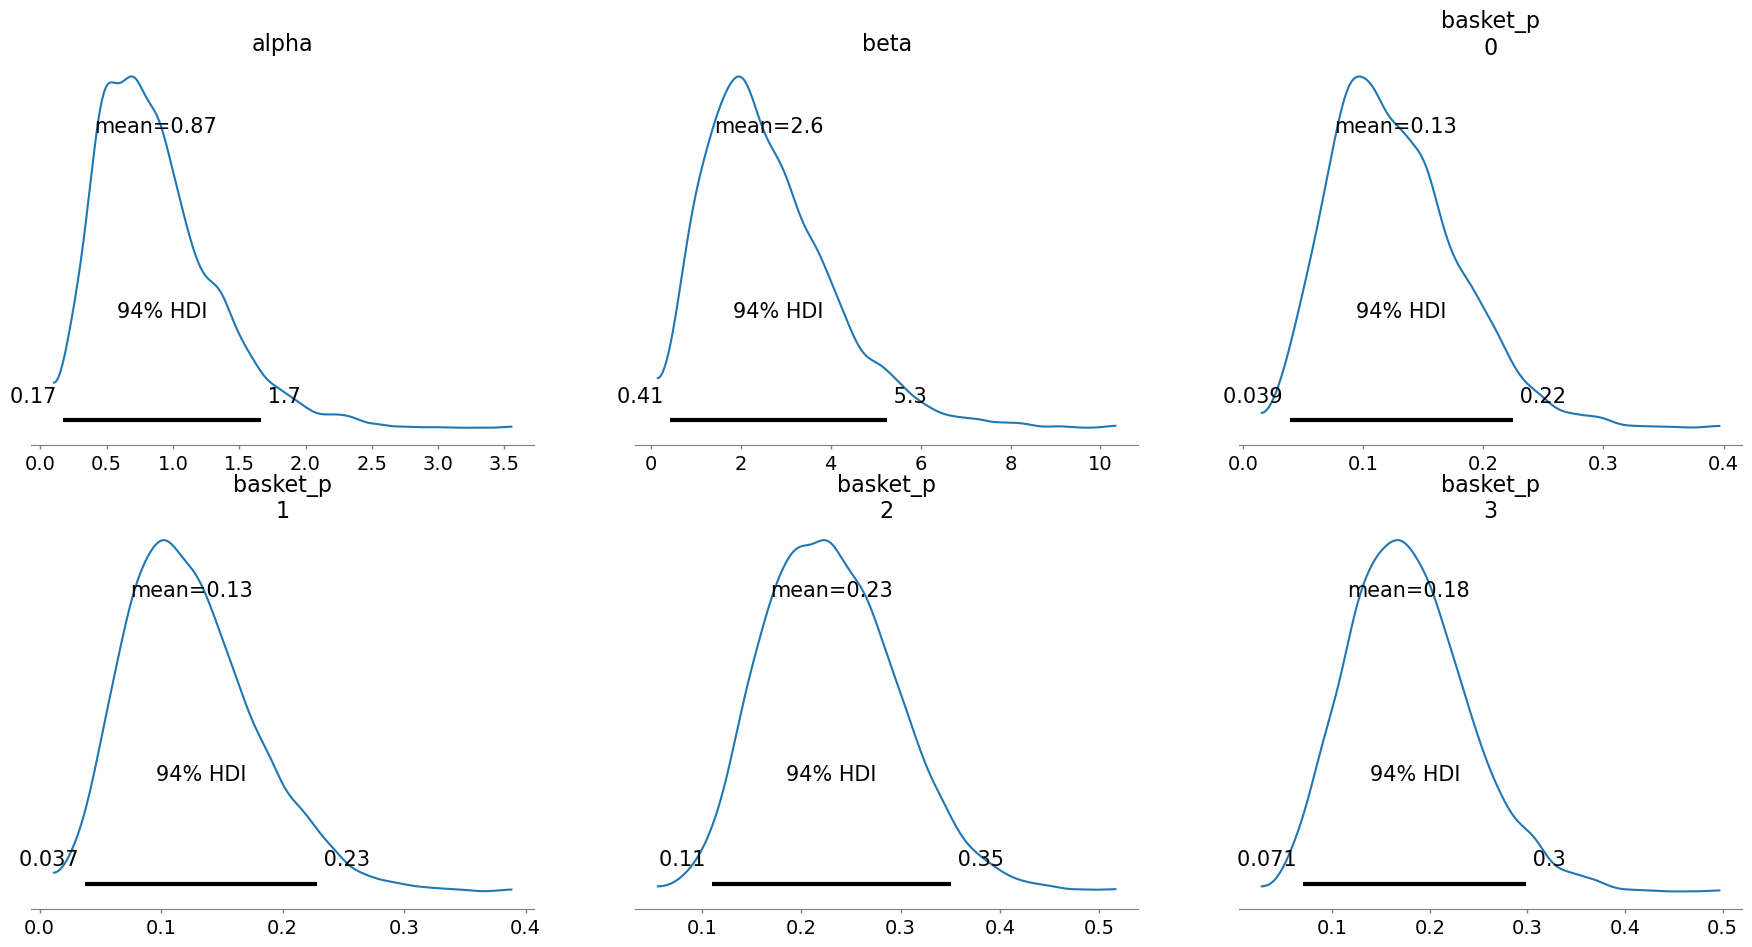

In [31]:
trial.plot_posterior(analysis_name, -1)

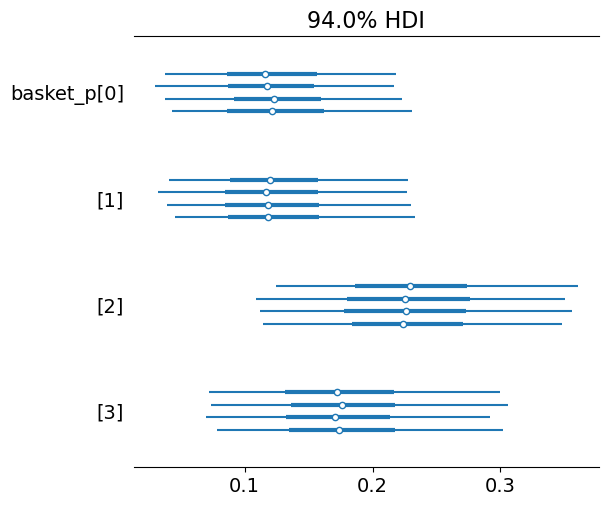

In [32]:
trial.plot_forest(analysis_name, -1)

In [33]:
trial.interim_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.52400,0.05,True,OPEN,2,10
1,0.91525,0.05,True,OPEN,4,10
2,0.52150,0.05,True,OPEN,2,10
3,0.25325,0.05,True,OPEN,1,10


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.5280,0.05,True,OPEN,3,15
1,0.7510,0.05,True,OPEN,4,15
2,0.5310,0.05,True,OPEN,3,15
3,0.2915,0.05,True,OPEN,2,15


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.29975,0.05,True,OPEN,3,20
1,0.50450,0.05,True,OPEN,4,20
2,0.70325,0.05,True,OPEN,5,20
3,0.31025,0.05,True,OPEN,3,20


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.15825,0.05,True,OPEN,3,25
1,0.31125,0.05,True,OPEN,4,25
2,0.50850,0.05,True,OPEN,5,25
3,0.31825,0.05,True,OPEN,4,25


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.17750,0.05,True,OPEN,4,30
1,0.17775,0.05,True,OPEN,4,30
2,0.50025,0.05,True,OPEN,6,30
3,0.51225,0.05,True,OPEN,6,30


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.6505,0.9,False,COMPLETED_INEFFECTIVE,4,35
1,0.6425,0.9,False,COMPLETED_INEFFECTIVE,4,35
2,0.9905,0.9,True,COMPLETED_EFFECTIVE,8,35
3,0.9100,0.9,True,COMPLETED_EFFECTIVE,6,35


In [34]:
trial.final_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.6505,0.9,False,COMPLETED_INEFFECTIVE,4,35
1,0.6425,0.9,False,COMPLETED_INEFFECTIVE,4,35
2,0.9905,0.9,True,COMPLETED_EFFECTIVE,8,35
3,0.9100,0.9,True,COMPLETED_EFFECTIVE,6,35


### BHM

In [35]:
analysis_name = analysis_names[1]
analysis_name

'BHM'

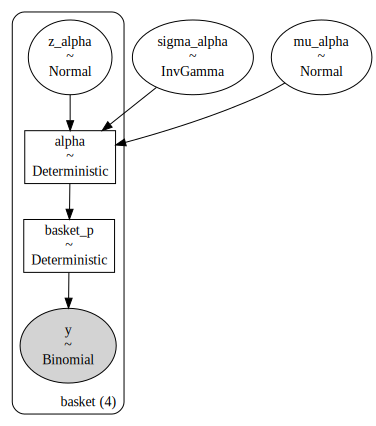

In [36]:
trial.visualise_model(analysis_name)

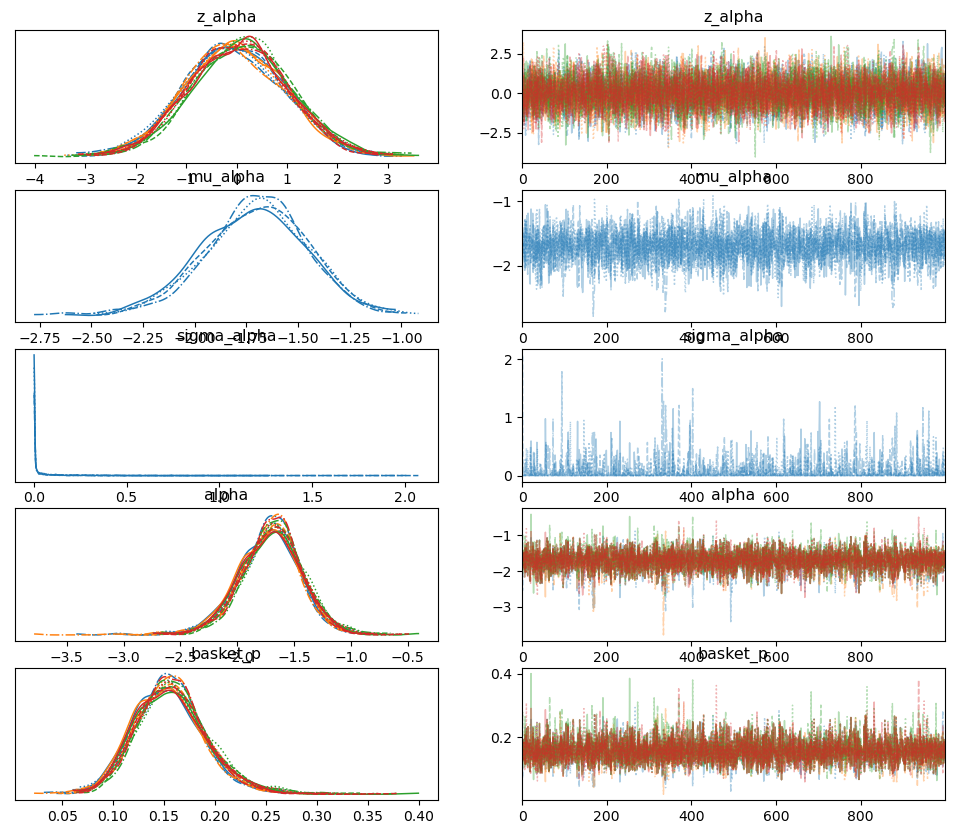

In [37]:
trial.plot_trace(analysis_name, -1)

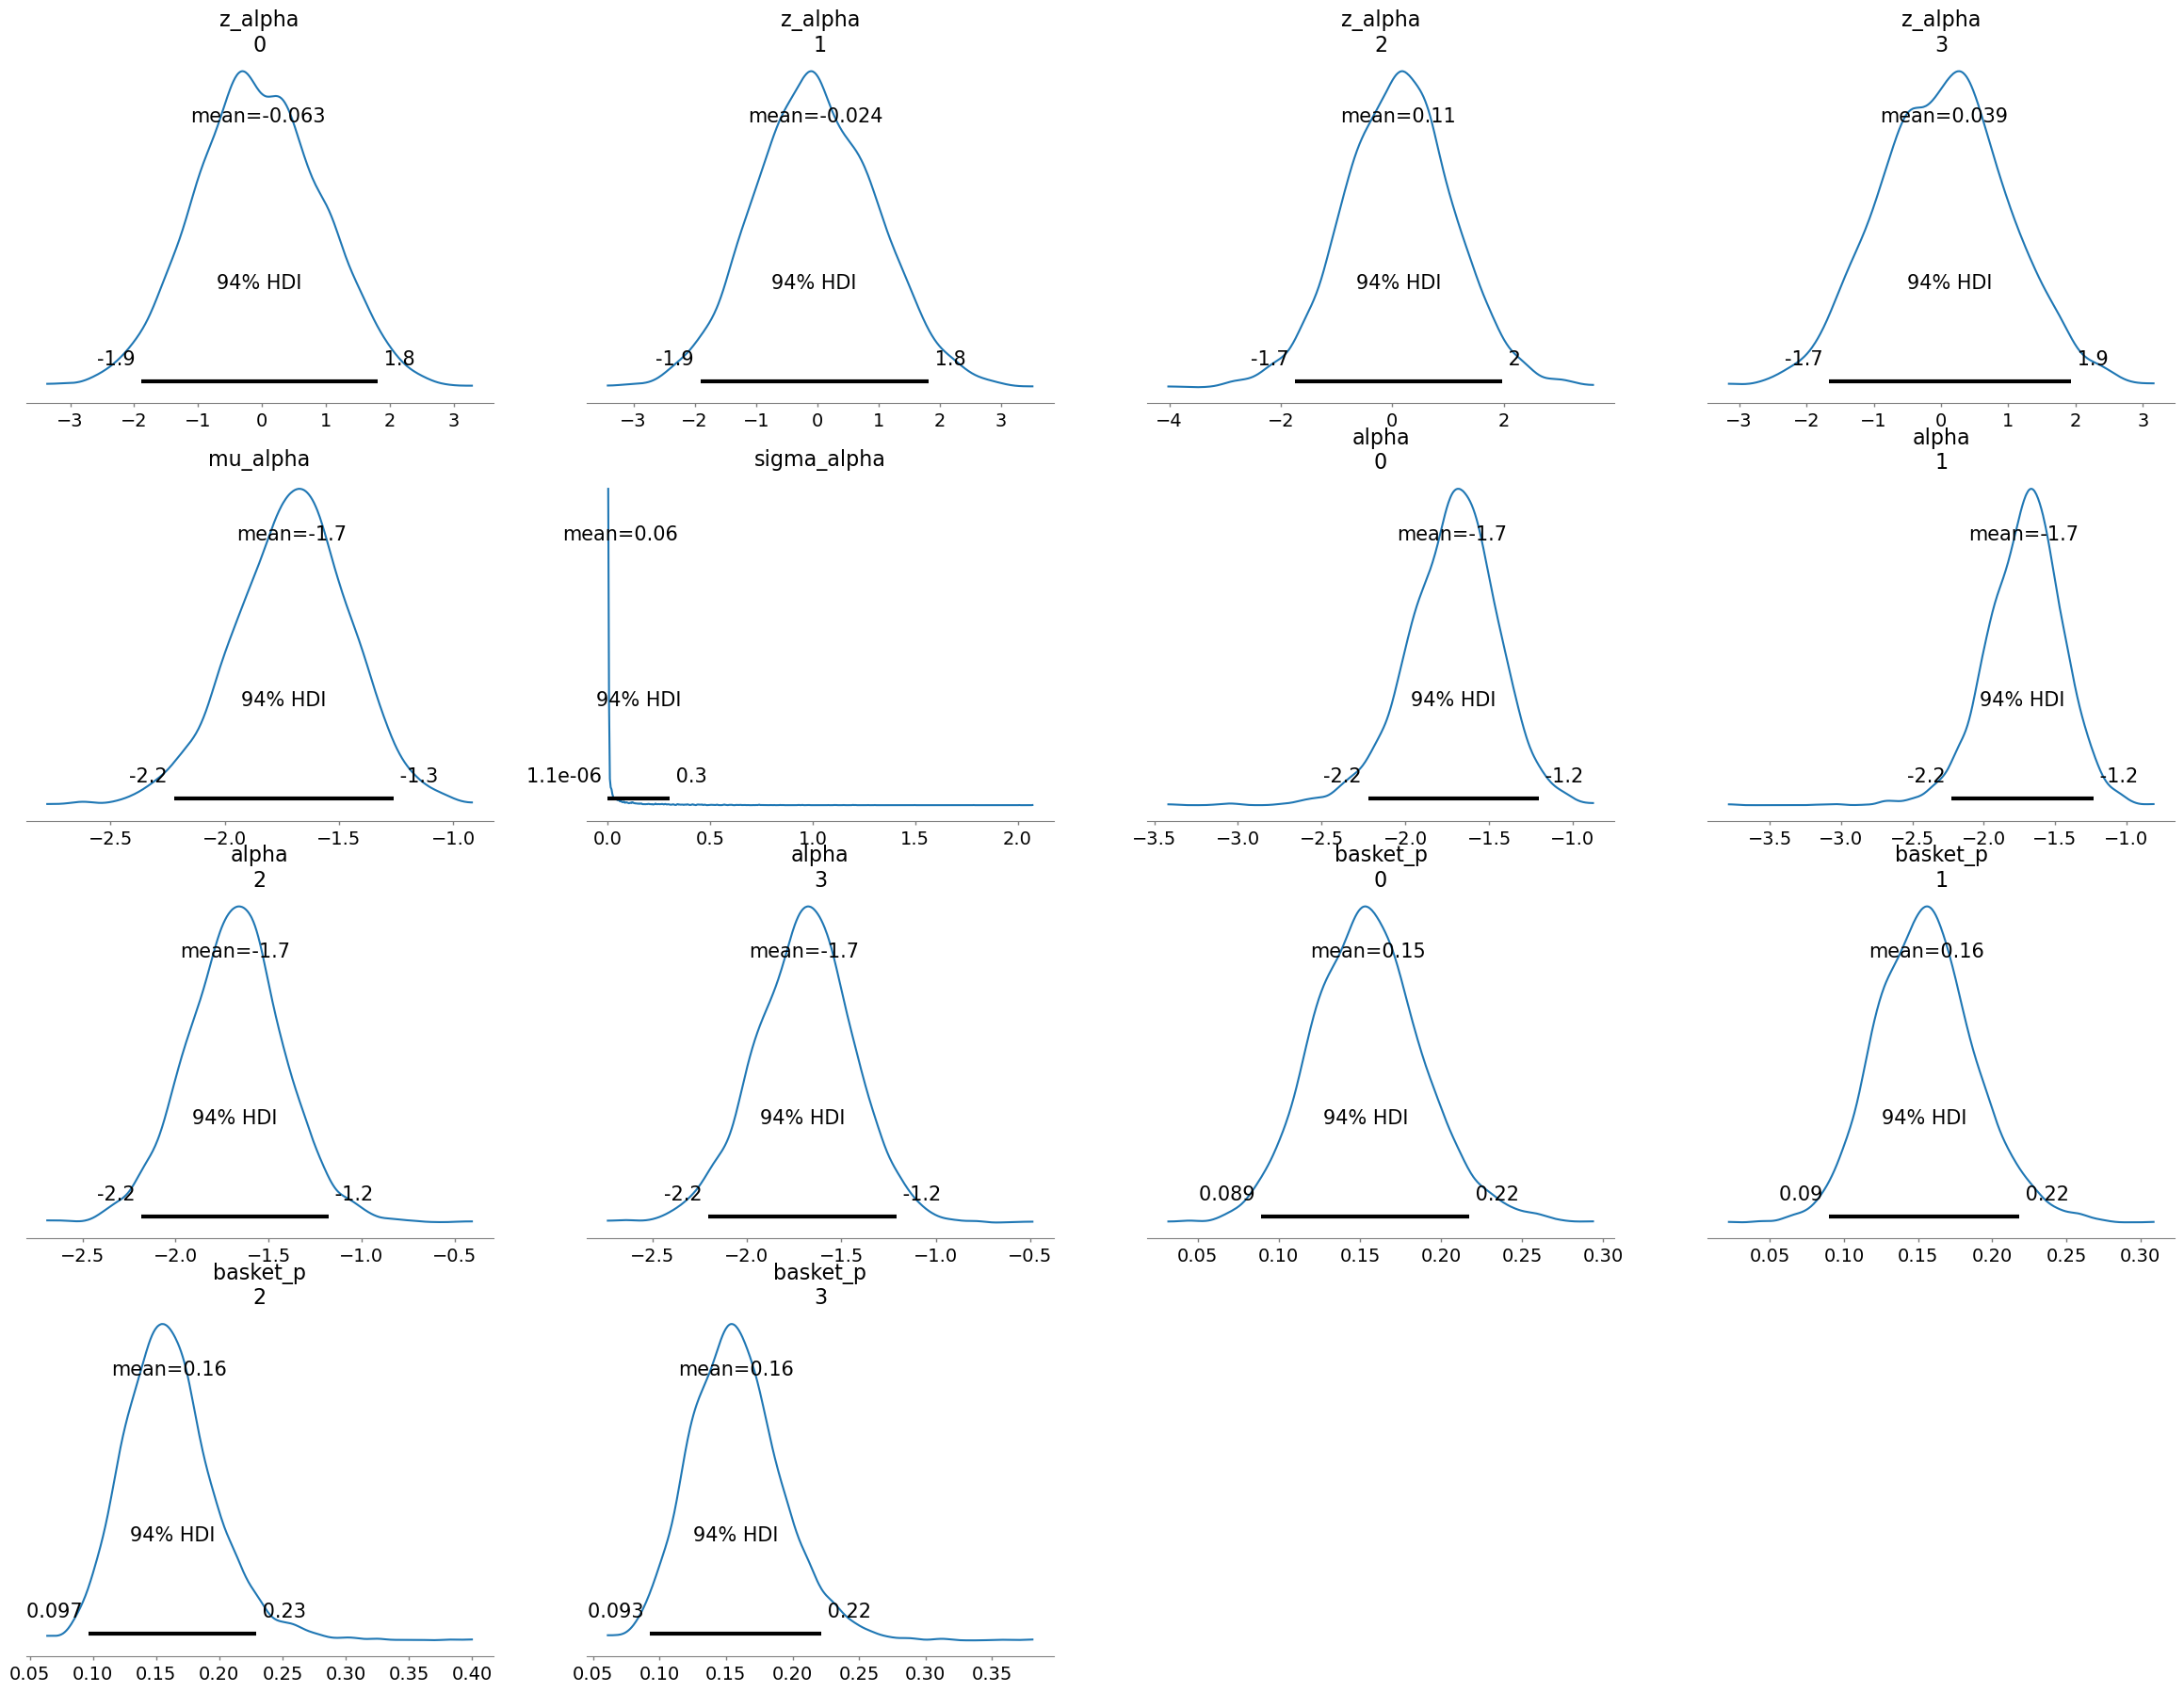

In [38]:
trial.plot_posterior(analysis_name, -1)

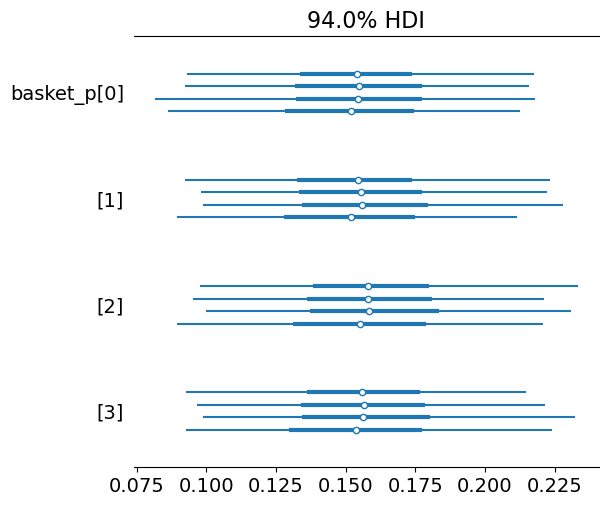

In [39]:
trial.plot_forest(analysis_name, -1)

In [40]:
trial.interim_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.62200,0.05,True,OPEN,2,10
1,0.65625,0.05,True,OPEN,4,10
2,0.61700,0.05,True,OPEN,2,10
3,0.59350,0.05,True,OPEN,1,10


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.47800,0.05,True,OPEN,3,15
1,0.49450,0.05,True,OPEN,4,15
2,0.48400,0.05,True,OPEN,3,15
3,0.46975,0.05,True,OPEN,2,15


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.35975,0.05,True,OPEN,3,20
1,0.37450,0.05,True,OPEN,4,20
2,0.38700,0.05,True,OPEN,5,20
3,0.35825,0.05,True,OPEN,3,20


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.13075,0.05,True,OPEN,3,25
1,0.14125,0.05,True,OPEN,4,25
2,0.14475,0.05,True,OPEN,5,25
3,0.14025,0.05,True,OPEN,4,25


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.16550,0.05,True,OPEN,4,30
1,0.16675,0.05,True,OPEN,4,30
2,0.17900,0.05,True,OPEN,6,30
3,0.17725,0.05,True,OPEN,6,30


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.95450,0.9,True,COMPLETED_EFFECTIVE,4,35
1,0.95825,0.9,True,COMPLETED_EFFECTIVE,4,35
2,0.97300,0.9,True,COMPLETED_EFFECTIVE,8,35
3,0.96600,0.9,True,COMPLETED_EFFECTIVE,6,35


In [41]:
trial.final_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.95450,0.9,True,COMPLETED_EFFECTIVE,4,35
1,0.95825,0.9,True,COMPLETED_EFFECTIVE,4,35
2,0.97300,0.9,True,COMPLETED_EFFECTIVE,8,35
3,0.96600,0.9,True,COMPLETED_EFFECTIVE,6,35
